In [3]:
# Importing the liabraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
%matplotlib inline 

In [4]:
#setting working directory
os.chdir("D:/Data Science Edwisor/6. Projects/1. Project One Cab Rental Company")


In [5]:
# Importing the dataset
dataset = pd.read_csv('train_cab.csv')

In [6]:
# Exploratory Data Analysis
# Converting to proper data type
dataset['fare_amount'] = pd.to_numeric(dataset['fare_amount'], errors = 'coerce')
dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'], errors = 'coerce')
dataset['passenger_count'] = dataset['passenger_count'].astype('object')
# Extracting useful information from 'pickup_datetime'
dataset['pickup_date'] = dataset['pickup_datetime'].dt.day
dataset['pickup_day'] = dataset['pickup_datetime'].dt.weekday
dataset['pickup_month'] = dataset['pickup_datetime'].dt.month
dataset['pickup_hour'] = dataset['pickup_datetime'].dt.hour
dataset['pickup_minute'] = dataset['pickup_datetime'].dt.minute
dataset['pickup_day'] = dataset['pickup_day'].astype('object')
dataset['pickup_hour'] = dataset['pickup_hour'].replace(0, 24)

In [7]:
# Removing pickup_datetime variable from dataset
dataset = dataset.iloc[:, [0,2,3,4,5,6,7,8,9,10,11]]

In [8]:
# Inspecting the Latitudes and longitudes
# Latitude(-90 - 90)
dataset[dataset['pickup_latitude'] < -90]
dataset[dataset['pickup_latitude'] > 90]
dataset = dataset.drop(dataset[dataset['pickup_latitude'] > 90].index, axis = 0)

dataset[dataset['dropoff_latitude'] < -90]
dataset[dataset['dropoff_latitude'] > 90]

# Longitude(-180 - 180)
dataset[dataset['pickup_longitude'] < -180]
dataset[dataset['pickup_longitude'] > 180]

dataset[dataset['dropoff_longitude'] < -180]
dataset[dataset['dropoff_longitude'] > 180]


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_month,pickup_hour,pickup_minute


In [9]:
# Data Preprocessing

# 1. Missing Value Analysis.
dataset.isnull().sum()

# Dropping the values with NAN. 
dataset = dataset.drop(dataset[dataset['pickup_date'].isnull()].index, axis = 0)
dataset = dataset.drop(dataset[dataset['fare_amount'].isnull()].index, axis = 0)
dataset = dataset.drop(dataset[dataset['passenger_count'].isnull()].index, axis = 0)
dataset.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_day           0
pickup_month         0
pickup_hour          0
pickup_minute        0
dtype: int64

In [10]:
# 2. Outiler Analysis.

# 1. Fare_amount
dataset['fare_amount'].describe()
dataset['fare_amount'].sort_values(ascending = False)
# Some very high values present in fare_amount
# Removing values > 150
dataset = dataset.drop(dataset[dataset['fare_amount'] > 150].index, axis = 0)
# removing values < 0
dataset = dataset.drop(dataset[dataset['fare_amount'] < 0].index, axis = 0)
dataset['fare_amount'].sort_values(ascending = True)
# Removing fare_amount = 0
dataset = dataset.drop(dataset[dataset['fare_amount'] == 0].index, axis = 0)

In [11]:
# 2. Passenger_count
dataset['passenger_count'].describe()
dataset['passenger_count'].sort_values(ascending = False)
# Some Very High values in this variable as well
# removing values > 6
dataset = dataset.drop(dataset[dataset['passenger_count'] > 6].index, axis = 0)
# removing passenger_count = 0
dataset = dataset.drop(dataset[dataset['passenger_count'] == 0].index, axis = 0)
dataset['passenger_count'].sort_values(ascending = True)
# removing passenger_count = 0.12
dataset = dataset.drop(dataset[dataset['passenger_count'] == 0.12].index, axis = 0)


In [12]:
# Extracting Meaningful information(Distance) from coordinates.
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 12742 * np.arcsin(np.sqrt(a))

dataset['distance_travelled'] = distance(dataset['pickup_latitude'], dataset['pickup_longitude'],
                          dataset['dropoff_latitude'], dataset['dropoff_longitude'])

In [13]:
# Outlier Analysis For Ditance_travelled
dataset['distance_travelled'].sort_values(ascending = False)
dataset['distance_travelled'].describe()
# Removing values more than 1000kms
dataset = dataset.drop(dataset[dataset['distance_travelled'] > 1000].index, axis = 0)
dataset['distance_travelled'].describe()
# Now max distance is 129.95
from collections import Counter 
Counter(dataset['distance_travelled'] == 0)
Counter(dataset['fare_amount'] == 0)
Counter((dataset['distance_travelled'] == 0) & (dataset['fare_amount'] > 2.5))
Counter((dataset['distance_travelled'] == 0) & (dataset['fare_amount'] == 2.5))
# Removing distance_travelled = 0 from dataset where fare is > 2.5
dataset = dataset.drop(dataset[(dataset['distance_travelled'] == 0) & (dataset['fare_amount'] > 2.5)].index, axis = 0)


In [14]:
# Removing the pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude from dataset
dataset = dataset.iloc[:, [0,5,6,7,8,9,10,11]]


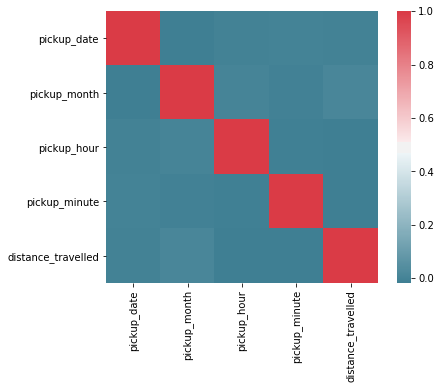

In [15]:
# Feature Selection
# Correlation Analysis(between numeric variables)
subset = dataset.iloc[:, [2,4,5,6,7]]

f, ax = plt.subplots(figsize = (7, 5))
corr = subset.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap = True),
           square = True, ax = ax)


In [16]:
# Visualisation

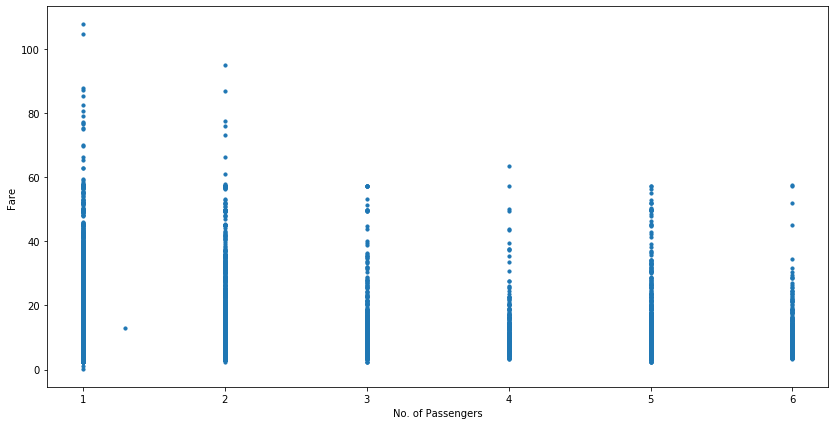

In [17]:
# 1. Passenger_Count
plt.figure(figsize=(14,7))
plt.scatter(x = dataset['passenger_count'], y = dataset['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

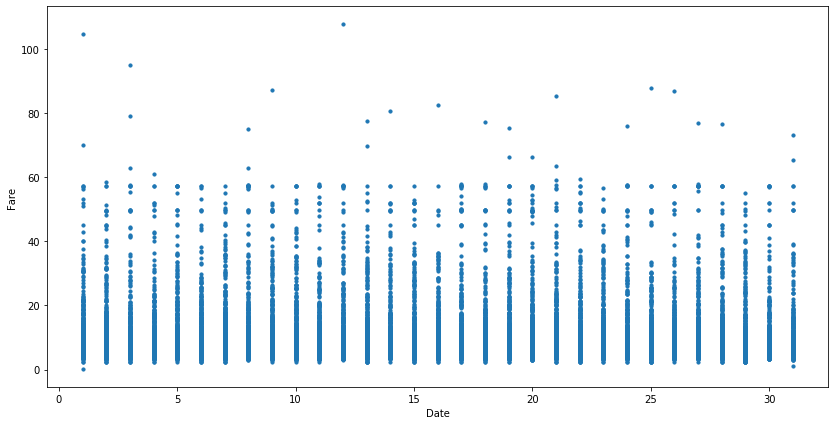

In [18]:
# 2. Pickup_date
plt.figure(figsize=(14,7))
plt.scatter(x = dataset['pickup_date'], y = dataset['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

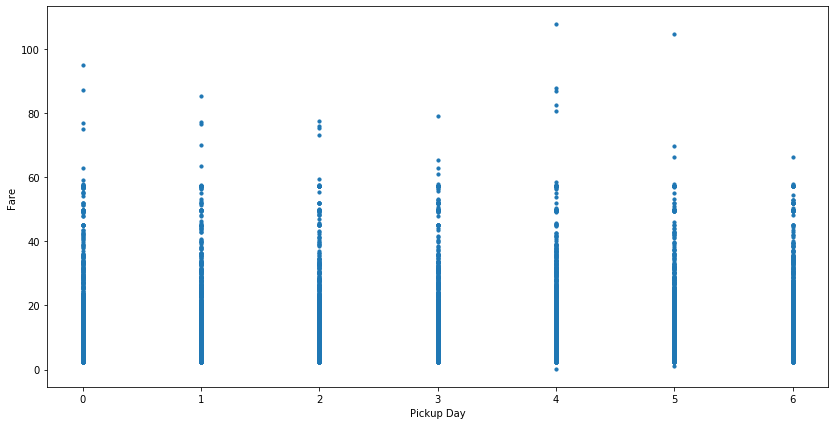

In [19]:
# 3. Pickup_day
plt.figure(figsize=(14,7))
plt.scatter(x = dataset['pickup_day'], y = dataset['fare_amount'], s=10)
plt.xlabel('Pickup Day')
plt.ylabel('Fare')
plt.show()

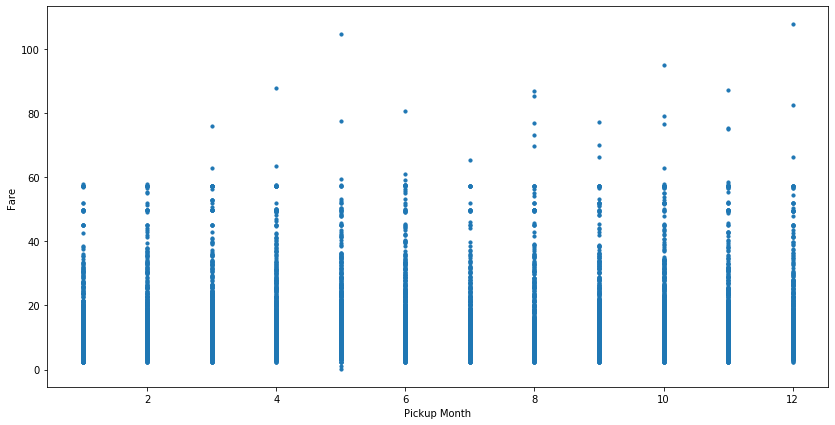

In [20]:
# 4. Pickup_month
plt.figure(figsize=(14,7))
plt.scatter(x = dataset['pickup_month'], y = dataset['fare_amount'], s=10)
plt.xlabel('Pickup Month')
plt.ylabel('Fare')
plt.show()

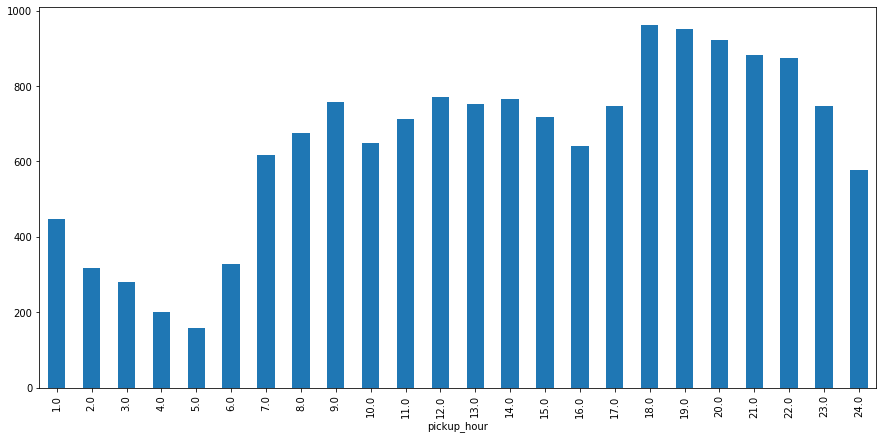

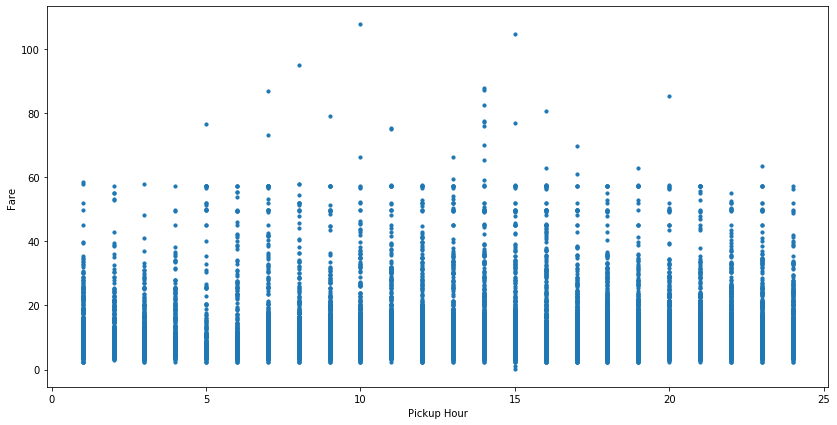

In [21]:
# 5. Pickup_hour
plt.figure(figsize=(15,7))
dataset.groupby(dataset["pickup_hour"])['pickup_hour'].count().plot(kind="bar")
plt.show()

plt.figure(figsize=(14,7))
plt.scatter(x = dataset['pickup_hour'], y = dataset['fare_amount'], s=10)
plt.xlabel('Pickup Hour')
plt.ylabel('Fare')
plt.show()

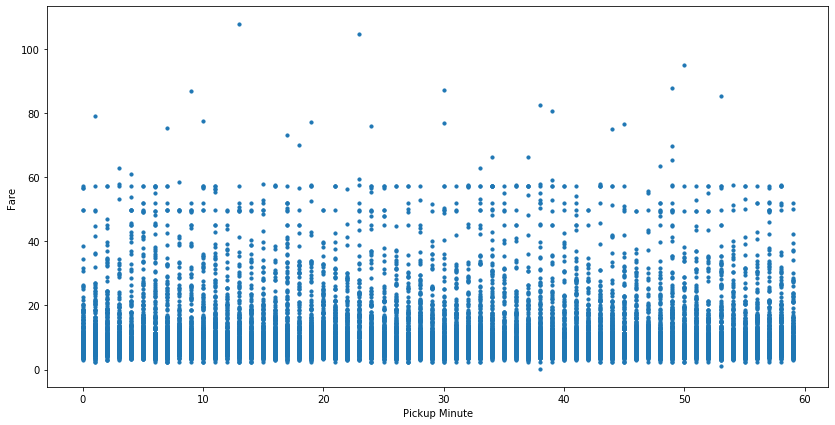

In [22]:
# 6. Pickup_minute
plt.figure(figsize=(14,7))
plt.scatter(x = dataset['pickup_minute'], y = dataset['fare_amount'], s=10)
plt.xlabel('Pickup Minute')
plt.ylabel('Fare')
plt.show()


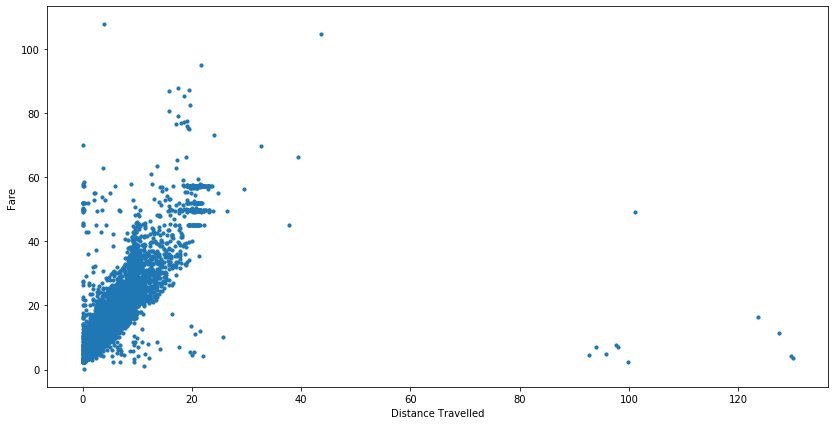

In [23]:
# 7. Distance_travelled
plt.figure(figsize=(14,7))
plt.scatter(x = dataset['distance_travelled'], y = dataset['fare_amount'], s=10)
plt.xlabel('Distance Travelled')
plt.ylabel('Fare')
plt.show()

fare_amount


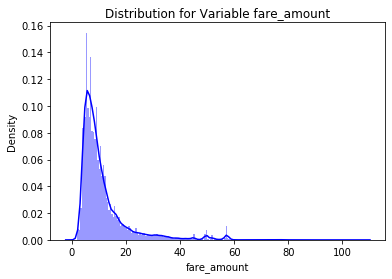

distance_travelled


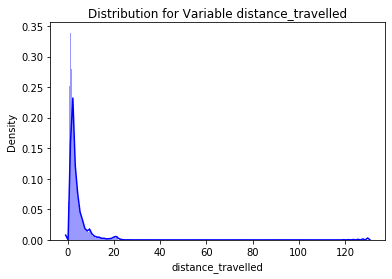

passenger_count


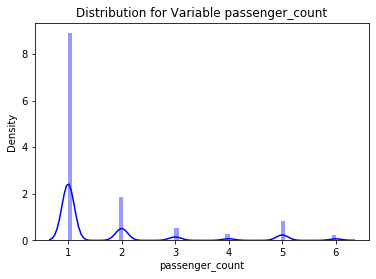

pickup_date


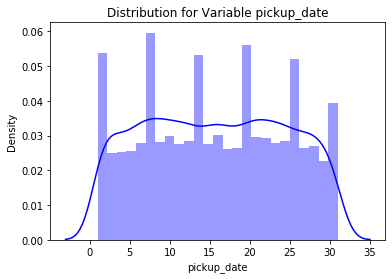

pickup_day


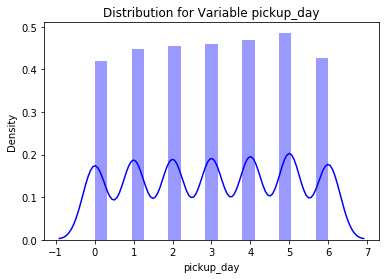

pickup_month


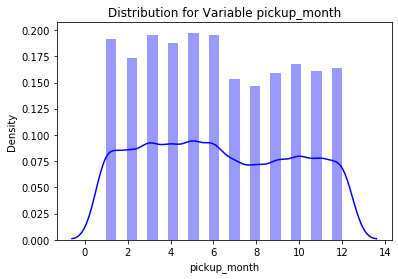

pickup_hour


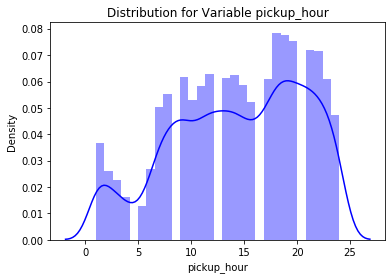

pickup_minute


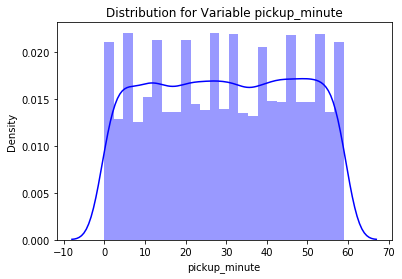

In [24]:
# Normality Check
for i in ['fare_amount']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()  
for i in ['distance_travelled']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
for i in ['passenger_count']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
for i in ['pickup_date']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
for i in ['pickup_day']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
for i in ['pickup_month']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
for i in ['pickup_hour']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
for i in ['pickup_minute']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

fare_amount


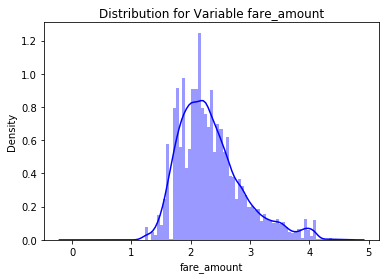

distance_travelled


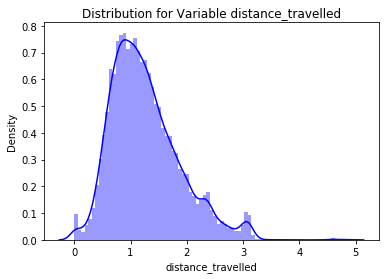

In [25]:
# Removing Skewness in distance_travelled and fare_amount
dataset['distance_travelled'] = np.log1p(dataset['distance_travelled'])
dataset['fare_amount'] = np.log1p(dataset['fare_amount'])
# Recheck for Normality
for i in ['fare_amount']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()
for i in ['distance_travelled']:
    print(i)
    sns.distplot(dataset[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [26]:
# Seperating independent and dependent variables.
X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values

In [27]:
# SPLITTING THE DATA INTO TRAIN AND TEST.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [28]:
# Building Models

In [29]:
# 1. Multiple Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor_LR = LinearRegression()
regressor_LR.fit(X_train, Y_train)
# Predicting on Test Set
Y_pred = regressor_LR.predict(X_test)

In [31]:
# Calculating Mape
def MAPE(true, pred):
    mape = np.mean(np.abs((true - pred)/true))* 100
    return mape

MAPE(Y_test, Y_pred)

12.836523925164014

In [32]:
# RMSE
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

0.2900719644831155


In [33]:
# R Square

# Train Data
Y_pred_TR = regressor_LR.predict(X_train) 
from sklearn.metrics import r2_score
r2_score(Y_train, Y_pred_TR)

# Test Data
r2_score(Y_test, Y_pred)

0.7350213834796294

In [34]:
# 2. Decision Tree 

# Fitting Decision Tree Regression Model
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(max_depth = 10, random_state = 0)
regressor_DT.fit(X_train, Y_train)

# Predicting on Test Set
Y_pred = regressor_DT.predict(X_test)

In [35]:
# Calculating Mape
MAPE(Y_test, Y_pred)

14.791310968744764

In [36]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))


0.299728047403293


In [37]:
# R Square
# Train Data
Y_pred_TR = regressor_DT.predict(X_train) 
r2_score(Y_train, Y_pred_TR)

# Test Data
r2_score(Y_test, Y_pred)

0.717086230746008

In [38]:
# 3. Random Forest
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(max_depth = 7, n_estimators = 300, random_state = 1)
regressor_RF.fit(X_train, Y_train)

# Predicting on Test Set
Y_pred = regressor_RF.predict(X_test)

In [39]:
# Calculating Mape
MAPE(Y_test, Y_pred)

13.713597905431785

In [40]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

0.2663340088977002


In [41]:
# R Square
# Train Data
Y_pred_TR = regressor_RF.predict(X_train) 
r2_score(Y_train, Y_pred_TR)

# Test Data
r2_score(Y_test, Y_pred)

0.7766157402514353

In [42]:
# As Random Forest has the best values for RMSE and Rsquared hence 
# lets make it as the final model.
# Let's try some parameter tuning for RF.

In [43]:
# Applying K-Fold Cross Validation for Random Forest
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor_RF,
                             X = X_train,
                             y = Y_train,
                             cv = 7)
# calculating the mean of obtained accuracies.
accuracies.mean()

0.7876157441254088

In [44]:
"""# Grid Search
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth' : [5,7,9], 'n_estimators' : [300, 400, 500],
               'random_state' : [0,1,2]}]
grid_search = GridSearchCV(estimator = regressor_RF,
                           param_grid = parameters,
                           cv = 7,
                           n_jobs = -1)
grid_search = grid_search.fit(X, Y)

# getting the scores and parameters
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_"""
# Commenting the above code as it takes time to run.

# The grid search suggests n_estimators = 300, random_state = 1. Lets try this on our
# regressor_RF and recheck the results.

"# Grid Search\nfrom sklearn.model_selection import GridSearchCV\nparameters = [{'max_depth' : [5,7,9], 'n_estimators' : [300, 400, 500],\n               'random_state' : [0,1,2]}]\ngrid_search = GridSearchCV(estimator = regressor_RF,\n                           param_grid = parameters,\n                           cv = 7,\n                           n_jobs = -1)\ngrid_search = grid_search.fit(X, Y)\n\n# getting the scores and parameters\nbest_accuracy = grid_search.best_score_\nbest_parameters = grid_search.best_params_"

In [45]:
# Reading and preparing the test set data for our model

dataset_test = pd.read_csv('test.csv')
# Converting to proper data types
dataset_test['pickup_datetime'] = pd.to_datetime(dataset_test['pickup_datetime'], errors = 'coerce')
dataset_test['passenger_count'] = dataset_test['passenger_count'].astype('object')
# Extracting useful information from 'pickup_datetime'
dataset_test['pickup_date'] = dataset_test['pickup_datetime'].dt.day
dataset_test['pickup_day'] = dataset_test['pickup_datetime'].dt.weekday
dataset_test['pickup_month'] = dataset_test['pickup_datetime'].dt.month
dataset_test['pickup_hour'] = dataset_test['pickup_datetime'].dt.hour
dataset_test['pickup_minute'] = dataset_test['pickup_datetime'].dt.minute
dataset_test['pickup_day'] = dataset_test['pickup_day'].astype('object')
dataset_test['pickup_hour'] = dataset_test['pickup_hour'].replace(0, 24)

In [46]:
# Removing pickup_datetime variable from dataset
dataset_test = dataset_test.iloc[:, [1,2,3,4,5,6,7,8,9,10]]

In [47]:
# Inspecting the Latitudes and longitudes
# Latitude(-90 - 90)
dataset_test[dataset_test['pickup_latitude'] < -90]
dataset_test[dataset_test['pickup_latitude'] > 90]

dataset_test[dataset_test['dropoff_latitude'] < -90]
dataset_test[dataset_test['dropoff_latitude'] > 90]

# Longitude(-180 - 180)
dataset_test[dataset_test['pickup_longitude'] < -180]
dataset_test[dataset_test['pickup_longitude'] > 180]

dataset_test[dataset_test['dropoff_longitude'] < -180]
dataset_test[dataset_test['dropoff_longitude'] > 180]
# None are beyond the range.

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_day,pickup_month,pickup_hour,pickup_minute


In [48]:
# 1. Missing Value Analysis.
dataset_test.isnull().sum()
# None Found

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_day           0
pickup_month         0
pickup_hour          0
pickup_minute        0
dtype: int64

In [49]:
# 2. Exploring the variables
# 1. Passenger_count
dataset_test['passenger_count'].describe()
dataset_test['passenger_count'].sort_values(ascending = False)
dataset_test['passenger_count'].sort_values(ascending = True)

0       1
4616    1
4615    1
4614    1
4613    1
       ..
9798    6
9799    6
9800    6
9780    6
9913    6
Name: passenger_count, Length: 9914, dtype: object

In [50]:
# Extracting Meaningful information(Distance) from coordinates.
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 12742 * np.arcsin(np.sqrt(a))

dataset_test['distance_travelled'] = distance(dataset_test['pickup_latitude'], dataset_test['pickup_longitude'],
                          dataset_test['dropoff_latitude'], dataset_test['dropoff_longitude'])

# Outlier Analysis For Ditance_travelled
dataset_test['distance_travelled'].sort_values(ascending = False)
dataset_test['distance_travelled'].describe()
# None found


count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance_travelled, dtype: float64

In [51]:
# Removing the pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude from dataset
dataset_test = dataset_test.iloc[:, 4:11]


distance_travelled


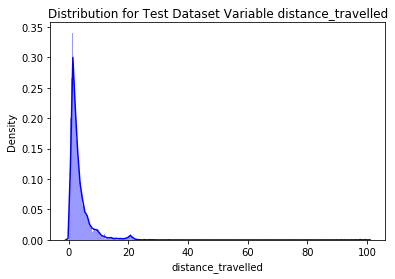

distance_travelled


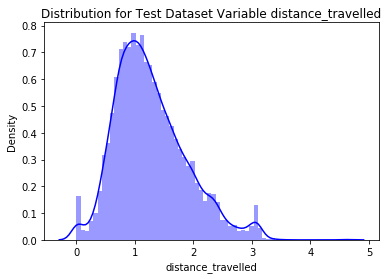

In [52]:
# Visualisations
# Normality Check
for i in ['distance_travelled']:
    print(i)
    sns.distplot(dataset_test[i],bins='auto',color='blue')
    plt.title("Distribution for Test Dataset Variable "+i)
    plt.ylabel("Density")
    plt.show()
# Removing Skewness in distance_travelled
dataset_test['distance_travelled'] = np.log1p(dataset_test['distance_travelled'])
# Normality ReCheck
for i in ['distance_travelled']:
    print(i)
    sns.distplot(dataset_test[i],bins='auto',color='blue')
    plt.title("Distribution for Test Dataset Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [53]:
# Now building the final model with whole training data
from sklearn.ensemble import RandomForestRegressor
regressor_RF_final = RandomForestRegressor(max_depth = 7, n_estimators = 300, random_state = 1)
regressor_RF_final.fit(X, Y)

Y_pred_final = regressor_RF_final.predict(X) 

In [54]:
# Calculating Mape(Training Data)
MAPE(Y, Y_pred_final)
# MAPE obtained 8.41%, Accuracy = 92%

8.418645426409242

In [55]:
# RMSE(Training Data)
print(np.sqrt(metrics.mean_squared_error(Y, Y_pred_final)))

0.2339525132568941


In [56]:
# R Square(Training Data)
r2_score(Y, Y_pred_final)

0.8156998811309972

In [57]:
# Predicting on Test Set
predicted_fares = regressor_RF_final.predict(dataset_test)

"""# storing the predicted fares.
Predicted_fares = pd.DataFrame({'Predicted_Fares': predicted_fares})
Predicted_fares.to_csv('Final Predicted Fares.csv', index = False)"""

"# storing the predicted fares.\nPredicted_fares = pd.DataFrame({'Predicted_Fares': predicted_fares})\nPredicted_fares.to_csv('Final Predicted Fares.csv', index = False)"

In [58]:
predicted_fares

array([2.26812305, 2.32253255, 1.71851018, ..., 3.93865487, 3.10247826,
       1.89350079])

In [ ]:
################################################### END ###################################################################